#### Imputing Missing Values through Various Strategies

In [2]:
import pandas as pd 
import numpy as np 

from sklearn import datasets as d 

iris = d.load_iris()
iris_X = iris.data 
masking_array = np.random.binomial(1,.25,iris_X.shape).astype(bool)

In [3]:
iris_X[masking_array] = np.nan

In [4]:
masking_array[:5]

array([[ True, False, False, False],
       [False, False, False, False],
       [ True, False,  True,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [5]:
iris_X[:5]

array([[nan, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [nan, 3.2, nan, nan],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

#### Imputing strategies: 
##### `mean (default)` <br>
##### `median` <br>
##### `most_frequent (mode)` 

In [6]:
from sklearn import impute 
imp = impute.SimpleImputer()
iris_X_prime = imp.fit_transform(iris_X)
iris_X_prime[:5]

array([[5.78018868, 3.5       , 1.4       , 0.2       ],
       [4.9       , 3.        , 1.4       , 0.2       ],
       [5.78018868, 3.2       , 3.74642857, 1.15929204],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.6       , 1.4       , 0.2       ]])

In [7]:
#Notice the difference in the position [1,2]

iris_X_prime[1,2]

1.4

In [8]:
iris_X[1,2]

1.4

In [9]:
#MEADIAN 

imp = impute.SimpleImputer(strategy='median')
iris_X_prime = imp.fit_transform(iris_X)
iris_X_prime[:5]

array([[5.7 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [5.7 , 3.2 , 4.25, 1.3 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ]])

In [10]:
#If missing values are -1, as it is possible 

iris_X[np.isnan(iris_X)] = -1 
iris_X[:5]

array([[-1. ,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [-1. ,  3.2, -1. , -1. ],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [11]:
#The using it with imputer will be as follows: 

imp = impute.SimpleImputer(missing_values=-1)
iris_X_prime = imp.fit_transform(iris_X)
iris_X_prime[:5]

array([[5.78018868, 3.5       , 1.4       , 0.2       ],
       [4.9       , 3.        , 1.4       , 0.2       ],
       [5.78018868, 3.2       , 3.74642857, 1.15929204],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.6       , 1.4       , 0.2       ]])

##### Pandas functionality to fill missing value is bit less reusable

In [12]:
iris_X_prime = np.where(pd.DataFrame(iris_X).isnull(),-1,iris_X)
iris_X_prime[:5]

array([[-1. ,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [-1. ,  3.2, -1. , -1. ],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [13]:
pd.DataFrame(iris_X).fillna(-1)[:5].values

array([[-1. ,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [-1. ,  3.2, -1. , -1. ],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

### Linear Modelling when we have Outliers

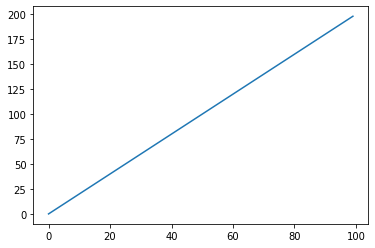

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline 

num_points = 100 
x_vals = np.arange(num_points)
y_truth = 2 * x_vals 
plt.plot(x_vals, y_truth)

##### Adding noise to that data and label it as `y_noisy`

[     0      2      4      6      8     10     12     14     16     18
     20     22     24     26     28     30     32     34     36     38
  -3300  -3628  -3972  -4332  -4708  -5100  -5508  -5932  -6372  -6828
  -7300  -7788  -8292  -8812  -9348  -9900 -10468 -11052 -11652 -12268
     80     82     84     86     88     90     92     94     96     98
    100    102    104    106    108    110    112    114    116    118
    120    122    124    126    128    130    132    134    136    138
    140    142    144    146    148    150    152    154    156    158
    160    162    164    166    168    170    172    174    176    178
    180    182    184    186    188    190    192    194    196    198]


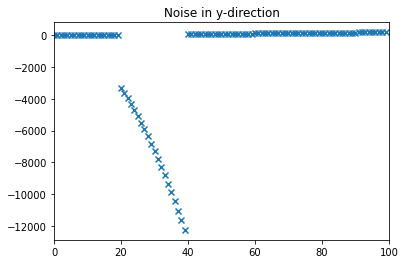

In [15]:
y_noisy = y_truth.copy()
#changing y-values of some points in the line 
y_noisy[20:40] = y_noisy[20:40] * (-4 * x_vals[20:40]) - 100 

print(y_noisy)

plt.title("Noise in y-direction")
plt.xlim([0,100])
plt.scatter(x_vals, y_noisy, marker='x')

In [16]:
#Import both LinearRegression and TheilSenRegressor 

from sklearn.linear_model import LinearRegression, TheilSenRegressor 
from sklearn.metrics import r2_score, mean_absolute_error 

OLS R-Squared:  -904.7565621836717 Mean Absolute Error:  1480.9397011701171
TSR R-Squared:  0.9999999999265342 Mean Absolute Error:  0.0004425033844090672


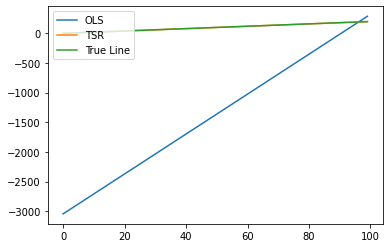

In [17]:
named_estimators = [('OLS',LinearRegression()),('TSR',TheilSenRegressor())]

for num_index, est in enumerate(named_estimators):
    y_pred = est[1].fit(x_vals.reshape(-1,1),y_noisy).predict(x_vals.reshape(-1,1))
    print(est[0],"R-Squared: ",r2_score(y_truth,y_pred),"Mean Absolute Error: ",mean_absolute_error(y_truth,y_pred))
    plt.plot(x_vals,y_pred,label=est[0])
plt.plot(x_vals, y_truth, label='True Line')
plt.legend(loc='upper left')

###### Theil-Sen overlaps the real line

##### Next, plotting the dataset and the estimated lines 

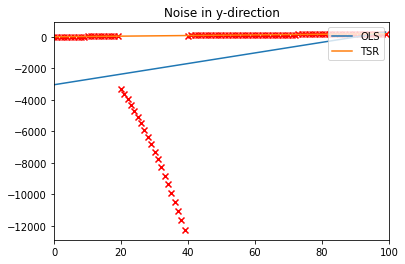

In [18]:
for num_index, est in enumerate(named_estimators):
    y_pred = est[1].fit(x_vals.reshape(-1,1),y_noisy).predict(x_vals.reshape(-1,1))
    plt.plot(x_vals, y_pred, label = est[0])

plt.legend(loc='upper right')
plt.title("Noise in y-direction")
plt.xlim([0,100])
plt.scatter(x_vals, y_noisy, marker='x',color='red')

`TheilSenRegressor` is a robust estimator - performs well in the presence of outliers. OLS regression, can decrease good results

Trying other estimators

In [19]:
from sklearn.linear_model import Ridge, LinearRegression, TheilSenRegressor, RANSACRegressor, ElasticNet, HuberRegressor 
from sklearn.metrics import r2_score, mean_absolute_error

In [20]:
named_estimators = [('OLS', LinearRegression()),('Ridge',Ridge()), ('TSR',TheilSenRegressor()),
                    ('RANSAC',RANSACRegressor()),('Elastic Net',ElasticNet()),('Huber',HuberRegressor())]

In [21]:
for num_index, est in enumerate(named_estimators):
    y_pred = est[1].fit(x_vals.reshape(-1,1),y_noisy).predict(x_vals.reshape(-1,1))
    print(est[0],"R-Squared: ", r2_score(y_truth,y_pred),"Mean Absolute Error: ",mean_absolute_error(y_truth,y_pred))

OLS R-Squared:  -904.7565621836717 Mean Absolute Error:  1480.9397011701171
Ridge R-Squared:  -904.7501604538695 Mean Absolute Error:  1480.9385250222022
TSR R-Squared:  0.9999999999265342 Mean Absolute Error:  0.0004425033844090672
RANSAC R-Squared:  1.0 Mean Absolute Error:  0.0
Elastic Net R-Squared:  -904.4272711687513 Mean Absolute Error:  1480.8791832083955
Huber R-Squared:  0.9999999867470167 Mean Absolute Error:  0.006644972890123926


##### Putting it all together with PipeLine

In [22]:
from sklearn.datasets import load_iris 
import numpy as np 
iris = load_iris()
iris_data = iris.data 
mask = np.random.binomial(1,.25, iris_data.shape).astype(bool)
iris_data[mask] = np.nan 
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, nan, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , nan, nan, 0.2]])

In [23]:
#Next, imputing first for the missing values,
#and then PCA 

from sklearn import pipeline, preprocessing, decomposition, impute 

#creating IMPUTER and PCA classes
pca = decomposition.PCA() 
imputer = impute.SimpleImputer()

In [24]:
#Loading them in PIPELINE 

pipe = pipeline.Pipeline([('imputer',imputer),('pca',pca)])
iris_data_transformed = pipe.fit_transform(iris_data)
iris_data_transformed[:5]

array([[-2.63732384,  0.18440746, -0.16205286,  0.23616388],
       [-2.6663669 , -0.13723681, -0.12539919, -0.1932054 ],
       [-2.82224298, -0.28006933, -0.07577852, -0.13367274],
       [-2.68253483, -0.41274729, -0.1287365 , -0.00929935],
       [-0.57970608, -0.76260092, -0.83825711,  0.15075786]])

In [27]:
pipe2 = pipeline.make_pipeline(imputer, pca) 
pipe2.steps 
[('imputer', impute.SimpleImputer(copy=True, missing_values='NaN',strategy='mean',verbose=0)),
 ('pca',decomposition.PCA(copy=True, iterated_power='auto',n_components=None,random_state=None, svd_solver='auto',tol=0.0,whiten=False))]

iris_data_transformed2 = pipe2.fit_transform(iris_data)
iris_data_transformed2[:5]


array([[-2.63732384,  0.18440746, -0.16205286,  0.23616388],
       [-2.6663669 , -0.13723681, -0.12539919, -0.1932054 ],
       [-2.82224298, -0.28006933, -0.07577852, -0.13367274],
       [-2.68253483, -0.41274729, -0.1287365 , -0.00929935],
       [-0.57970608, -0.76260092, -0.83825711,  0.15075786]])

In [31]:
#Accessing the attributes of each object in a pipeline

pipe2.set_params(pca__n_components=2)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2))])

In [32]:
iris_data_transformed3 = pipe2.fit_transform(iris_data)
iris_data_transformed3[:5]

array([[-2.63732384,  0.18440746],
       [-2.6663669 , -0.13723681],
       [-2.82224298, -0.28006933],
       [-2.68253483, -0.41274729],
       [-0.57970608, -0.76260092]])